# Images Exploration and Visualization

## 📌 Notebook Objective  

This notebook focuses on **exploring the image data** available in the dataset.  
We will:  
✔ **Load structured data** (`X_full_train` and `X_test`).  
✔ **Generate image filenames** to link each entry to its corresponding image file.  
✔ **Verify the availability of image files** in the dataset.  
✔ **Analyze image properties** (size, format,color mode, brightness & contrast).  
✔ **Display a selection of product images** to assess their quality and consistency.  

Understanding the image data structure is crucial before integrating it into **our modeling pipeline**.  


## 1. Load `X_full_train` and `X_test` (Pickle Files) 

###  Import Required Libraries 

In [62]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
import sys
from pathlib import Path
import importlib
import pandas as pd
import numpy as np
import pickle
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import math
import random

#### Setting Up Project Paths and Configurations

In [46]:
# Get the current notebook directory
CURRENT_DIR = Path(os.getcwd()).resolve()

# Automatically find the project root (go up 1 level)
PROJECT_ROOT = CURRENT_DIR.parents[1]

# Add project root to sys.path
sys.path.append(str(PROJECT_ROOT))

# Function to get relative paths from project root
def get_relative_path(absolute_path):
    return str(Path(absolute_path).relative_to(PROJECT_ROOT))

# Print project root directory
print(f"Project Root Directory: {PROJECT_ROOT.name}")  # Display only the root folder name

import config  # Now Python can find config.py

Project Root Directory: Data_Scientist_Rakuten_Project-main


In [47]:
# Reload config to ensure any updates are applied
importlib.reload(config)

# Define directory and file paths
INTERIM_TEXT_DIR = Path(config.INTERIM_TEXT_DIR)

X_FULL_TRAIN_PATH = INTERIM_TEXT_DIR / "X_full_train.pkl"
X_TEST_SUB_PATH = INTERIM_TEXT_DIR / "X_test_submission.pkl"  # Indicating it's for submission

# Function to load a Pickle file safely
def load_pickle(file_path: Path, dataset_name: str):
    """Loads a pickle file with error handling and basic visualization."""
    if file_path.exists():
        try:
            data = pd.read_pickle(file_path)
            print(f"Successfully loaded `{dataset_name}` | Shape: {data.shape}\n")
            display(data.head())  # Display first few rows
            return data
        except Exception as e:
            print(f"Error loading `{dataset_name}`: {e}")
    else:
        print(f"File not found: {file_path}")
    return None

# Load datasets
X_full_train = load_pickle(X_FULL_TRAIN_PATH, "X_full_train.pkl")
x_test_submission = load_pickle(X_TEST_SUB_PATH, "X_test_submission.pkl")  # Shortened variable name


Successfully loaded `X_full_train.pkl` | Shape: (84916, 5)



designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  \
0                                                NaN  3804725264  1263597046   
1                                                NaN   436067568  1008141237   
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
3                                                NaN    50418756   457047496   
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786   

   prdtypecode  
0           10  
1         2280  
2           50  
3         1280  
4         2705

Successfully loaded `X_test_submission.pkl` | Shape: (13812, 4)



designation  \
84916  Folkmanis Puppets - 2732 - Marionnette Et Théâ...   
84917  Porte Flamme Gaxix - Flamebringer Gaxix - 136/...   
84918                  Pompe de filtration Speck Badu 95   
84919                        Robot de piscine électrique   
84920  Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...   

                                             description   productid  \
84916                                                NaN   516376098   
84917                                                NaN   133389013   
84918                                                NaN  4128438366   
84919  <p>Ce robot de piscine d&#39;un design innovan...  3929899732   
84920                                                NaN   152993898   

          imageid  
84916  1019294171  
84917  1274228667  
84918  1295960357  
84919  1265224052  
84920   940543690

## 2. Generating Image Filenames  

The dataset provides **only image identifiers** (`imageid`) and **product identifiers** (`productid`) without direct file paths.  

To properly **link each product to its corresponding image file**, we generate filenames using the **naming convention**:  

📌 **Format:**  
`image_<imageid>_product_<productid>.jpg`  

📌 **Example:**  
For `imageid = 1263597046` and `productid = 436067568`, the corresponding image file will be:  
`image_1263597046_product_436067568.jpg`  

This step ensures that each row in **both training (`X_full_train`) and test (`X_test_sub`) datasets** is correctly mapped to its image.


In [77]:
# Generate image filenames based on imageid and productid for training set
X_full_train["image_name"] = (
    "image_" + X_full_train["imageid"].astype(str) +
    "_product_" + X_full_train["productid"].astype(str) +
    ".jpg"
)

# Generate image filenames for test set
x_test_submission["image_name"] = (
    "image_" + x_test_submission["imageid"].astype(str) +
    "_product_" + x_test_submission["productid"].astype(str) +
    ".jpg"
)

# Display samples to verify the format
print("Sample training image filenames:")
display(X_full_train.head(4))

print("\nSample test image filenames:")
display(x_test_submission.head(4))


Sample training image filenames:


designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   

                                         description   productid     imageid  \
0                                                NaN  3804725264  1263597046   
1                                                NaN   436067568  1008141237   
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
3                                                NaN    50418756   457047496   

   prdtypecode                               image_name  
0           10  image_1263597046_product_3804725264.jpg  
1         2280   image_1008141237_product_436067568.jpg  
2           50    image_938777978_product_201115110.jpg  
3         1280     image_457047496_product_50418756.jpg


Sample test image filenames:


designation  \
84916  Folkmanis Puppets - 2732 - Marionnette Et Théâ...   
84917  Porte Flamme Gaxix - Flamebringer Gaxix - 136/...   
84918                  Pompe de filtration Speck Badu 95   
84919                        Robot de piscine électrique   

                                             description   productid  \
84916                                                NaN   516376098   
84917                                                NaN   133389013   
84918                                                NaN  4128438366   
84919  <p>Ce robot de piscine d&#39;un design innovan...  3929899732   

          imageid                               image_name  
84916  1019294171   image_1019294171_product_516376098.jpg  
84917  1274228667   image_1274228667_product_133389013.jpg  
84918  1295960357  image_1295960357_product_4128438366.jpg  
84919  1265224052  image_1265224052_product_3929899732.jpg

## 3. Verifying Image Availability  

Before proceeding with image analysis, we must ensure that **all expected image files exist** in the dataset.

### 3.1 Checking Image Availability for Training Data  

In [49]:
# Reload config to ensure any updates are applied
importlib.reload(config)

# Define the directory for training images
RAW_IMAGE_TRAIN_DIR = Path(config.RAW_IMAGE_TRAIN_DIR)  # Path to raw training images

# Get the list of actual images in the training folder
existing_train_images = set(os.listdir(RAW_IMAGE_TRAIN_DIR))

# Check for missing and extra images in the training set
missing_train_images = set(X_full_train["image_name"]) - existing_train_images
extra_train_images = existing_train_images - set(X_full_train["image_name"])

# Display stats
print(f"Training Data - Expected Images: {len(X_full_train)}")
print(f"Training Data - Images Found in Folder: {len(existing_train_images)}")
print(f"Training Data - Missing Images: {len(missing_train_images)}")
print(f"Training Data - Extra Images Not in Dataset: {len(extra_train_images)}")

# Display sample missing and extra images
if missing_train_images:
    print("\n[INFO] Sample missing training images:")
    print(list(missing_train_images)[:10])

if extra_train_images:
    print("\n[WARNING] Sample extra training images not in dataset:")
    print(list(extra_train_images)[:10])


Training Data - Expected Images: 84916
Training Data - Images Found in Folder: 84916
Training Data - Missing Images: 0
Training Data - Extra Images Not in Dataset: 0


### 3.2 Checking Image Availability for Testing Data  

In [50]:
# Reload config to ensure any updates are applied
importlib.reload(config)

# Define the directory for submission images
RAW_IMAGE_SUBMISSION_DIR = Path(config.RAW_IMAGE_TEST_SUB_DIR)  # Path to raw test/submission images

# Get the list of actual images in the submission folder
existing_submission_images = set(os.listdir(RAW_IMAGE_SUBMISSION_DIR))

# Check for missing and extra images in the submission set
missing_submission_images = set(x_test_submission["image_name"]) - existing_submission_images
extra_submission_images = existing_submission_images - set(x_test_submission["image_name"])

# Display stats
print(f"Submission Data - Expected Images: {len(x_test_submission)}")
print(f"Submission Data - Images Found in Folder: {len(existing_submission_images)}")
print(f"Submission Data - Missing Images: {len(missing_submission_images)}")
print(f"Submission Data - Extra Images Not in Dataset: {len(extra_submission_images)}")

# Display sample missing and extra images
if missing_submission_images:
    print("\n[INFO] Sample missing submission images:")
    print(list(missing_submission_images)[:10])

if extra_submission_images:
    print("\n[WARNING] Sample extra submission images not in dataset:")
    print(list(extra_submission_images)[:10])


Submission Data - Expected Images: 13812
Submission Data - Images Found in Folder: 13812
Submission Data - Missing Images: 0
Submission Data - Extra Images Not in Dataset: 0


## 4. Image Properties Analysis  

### 4.1 Image Size & Format in Training and Testing Data  

In [24]:
# Reload config to ensure any updates are applied
importlib.reload(config)

# Define image directories using config paths
RAW_IMAGE_TRAIN_DIR = Path(config.RAW_IMAGE_TRAIN_DIR)
RAW_IMAGE_TEST_SUB_DIR = Path(config.RAW_IMAGE_TEST_SUB_DIR)


def analyze_image_properties(df, image_dir, dataset_name="Dataset"):
    """
    Analyze image properties (size & format) for a given dataset.

    Parameters:
    - df (pd.DataFrame): DataFrame containing image filenames.
    - image_dir (str): Path to the directory containing images.
    - dataset_name (str): Name of the dataset for display purposes.

    Returns:
    - Prints summary of image sizes and formats.
    """
    image_sizes = []
    image_formats = []

    for img_name in df["image_name"]:
        img_path = os.path.join(image_dir, img_name)

        # Try opening the image and extracting properties
        try:
            with Image.open(img_path) as img:
                image_sizes.append(img.size)  # (width, height)
                image_formats.append(img.format)  # JPEG, PNG, etc.
        except Exception as e:
            print(f"Skipping {img_name} (corrupt or missing): {e}")

    # Check unique values
    unique_sizes = set(image_sizes)
    unique_formats = set(image_formats)

    print(f"\n{dataset_name} - Total images analyzed: {len(image_sizes)}")

    # Image size verification
    if len(unique_sizes) == 1:
        print(f"All images have the same size: {unique_sizes.pop()}")
    else:
        print(f" Detected {len(unique_sizes)} different image sizes.")
        print(f" Sample unique sizes: {list(unique_sizes)[:5]}")  # Display first 5 unique sizes

    # Image format verification
    if len(unique_formats) == 1:
        print(f"All images have the same format: {unique_formats.pop()}")
    else:
        print(f" Detected {len(unique_formats)} different image formats.")
        print(f"Sample unique formats: {list(unique_formats)}")  # Display all detected formats

        
        
# Run the analysis for training images
analyze_image_properties(X_full_train, RAW_IMAGE_TRAIN_DIR, dataset_name="Training Data")

# Run the analysis for testing images
analyze_image_properties(x_test_submission, RAW_IMAGE_TEST_SUB_DIR, dataset_name="Testing Data")


Training Data - Total images analyzed: 84916
All images have the same size: (500, 500)
All images have the same format: JPEG

Testing Data - Total images analyzed: 13812
All images have the same size: (500, 500)
All images have the same format: JPEG


### 4.2 Check Image Color Mode for Training and Testing Data  

In [25]:
# Reload config to ensure any updates are applied
importlib.reload(config)

# Define image directories using config paths
RAW_IMAGE_TRAIN_DIR = Path(config.RAW_IMAGE_TRAIN_DIR)
RAW_IMAGE_TEST_SUB_DIR = Path(config.RAW_IMAGE_TEST_SUB_DIR)

def check_image_color_mode(df, image_dir):
    """
    Check whether images are in color (RGB) or grayscale (L).

    Parameters:
    - df (pd.DataFrame): DataFrame containing image names.
    - image_dir (str): Path to the directory containing the images.

    Returns:
    - DataFrame with an additional column 'color_mode' indicating "RGB" or "Grayscale".
    - Summary count of RGB vs. Grayscale images.
    """
    color_modes = []

    for img_name in df["image_name"]:
        img_path = os.path.join(image_dir, img_name)
        
        if os.path.exists(img_path):  # Ensure the image exists before processing
            try:
                with Image.open(img_path) as img:
                    color_modes.append(img.mode)  # Store mode (RGB or L)
            except Exception as e:
                print(f"Error loading {img_name}: {e}")
                color_modes.append("Error")  # Mark problematic images
        else:
            color_modes.append("Missing")  # Mark missing files

    # Add the results to the DataFrame
    df["color_mode"] = color_modes

    # Compute summary statistics
    summary = df["color_mode"].value_counts()
    total_images = len(df)

    print(f"\n Image Color Mode Summary for {image_dir}:")
    for mode, count in summary.items():
        percentage = (count / total_images) * 100
        print(f"{mode}: {count} images ({percentage:.2f}%)")

    print(f"Total images examined: {total_images}")

    return df

# Run the function separately for training and testing sets
X_full_train = check_image_color_mode(X_full_train, RAW_IMAGE_TRAIN_DIR)
x_test_submission = check_image_color_mode(x_test_submission, RAW_IMAGE_TEST_SUB_DIR)



 Image Color Mode Summary for D:\Data_Science\Append_Data_Engineer_AWS_MLOPS\Data_Scientist_Rakuten_Project-main\data\raw_images\image_train:
RGB: 84916 images (100.00%)
Total images examined: 84916

 Image Color Mode Summary for D:\Data_Science\Append_Data_Engineer_AWS_MLOPS\Data_Scientist_Rakuten_Project-main\data\raw_images\image_test:
RGB: 13812 images (100.00%)
Total images examined: 13812


### 4.3 Analyzing Brightness & Contrast for Training and Testing Data  

In [31]:

def analyze_brightness_contrast(df, image_dir, dataset_name="Dataset"):
    """
    Analyze brightness and contrast of images in a dataset.

    Parameters:
    - df (pd.DataFrame): DataFrame containing image filenames.
    - image_dir (str): Path to the directory containing images.
    - dataset_name (str): Name of the dataset for display purposes.

    Returns:
    - Prints summary statistics for brightness and contrast.
    - Displays histograms for brightness and contrast distribution.
    """
    brightness_values = []
    contrast_values = []

    for img_name in df["image_name"]:
        img_path = os.path.join(image_dir, img_name)

        # Check if file exists before processing
        if os.path.exists(img_path):
            try:
                with Image.open(img_path) as img:
                    img_gray = img.convert("L")  # Convert to grayscale for analysis
                    img_array = np.array(img_gray)

                    # Compute brightness (mean pixel intensity)
                    brightness = img_array.mean()

                    # Compute contrast (standard deviation of pixel intensity)
                    contrast = img_array.std()

                    brightness_values.append(brightness)
                    contrast_values.append(contrast)
            except Exception as e:
                print(f"Skipping {img_name} (corrupt or missing): {e}")
        else:
            print(f"Missing image: {img_name}")

    # Summary statistics
    print(f"\n '{dataset_name} - Brightness & Contrast Analysis")
    print(f"Total images analyzed: {len(brightness_values)}")
    
    print(f"Brightness (Mean Pixel Intensity)")
    print(f"  - Min: {np.min(brightness_values):.2f}")
    print(f"  - Max: {np.max(brightness_values):.2f}")
    print(f"  - Avg: {np.mean(brightness_values):.2f}")

    print(f"Contrast (Pixel Intensity Standard Deviation)")
    print(f"  - Min: {np.min(contrast_values):.2f}")
    print(f"  - Max: {np.max(contrast_values):.2f}")
    print(f"  - Avg: {np.mean(contrast_values):.2f}")

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].hist(brightness_values, bins=50, color="blue", alpha=0.7)
    axes[0].set_title(f"{dataset_name} - Brightness Distribution")
    axes[0].set_xlabel("Brightness (Mean Pixel Intensity)")
    axes[0].set_ylabel("Frequency")

    axes[1].hist(contrast_values, bins=50, color="red", alpha=0.7)
    axes[1].set_title(f"{dataset_name} - Contrast Distribution")
    axes[1].set_xlabel("Contrast (Pixel Intensity Std Dev)")
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()



 'Training Data - Brightness & Contrast Analysis
Total images analyzed: 84916
Brightness (Mean Pixel Intensity)
  - Min: 2.44
  - Max: 255.00
  - Avg: 196.40
Contrast (Pixel Intensity Standard Deviation)
  - Min: 0.00
  - Max: 126.25
  - Avg: 62.06


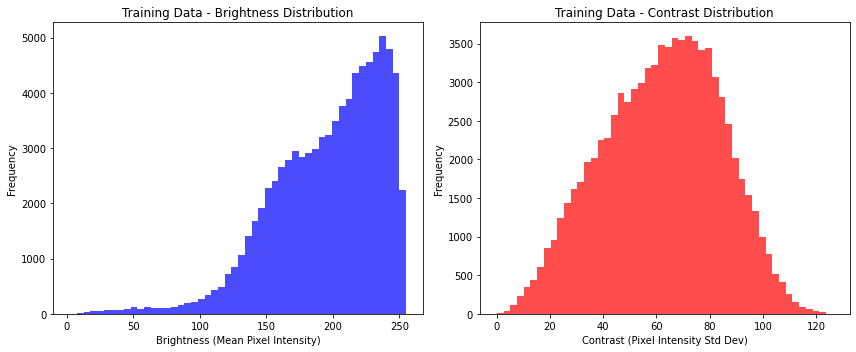


 'Testing Data - Brightness & Contrast Analysis
Total images analyzed: 13812
Brightness (Mean Pixel Intensity)
  - Min: 8.74
  - Max: 254.76
  - Avg: 196.56
Contrast (Pixel Intensity Standard Deviation)
  - Min: 1.94
  - Max: 124.14
  - Avg: 62.17


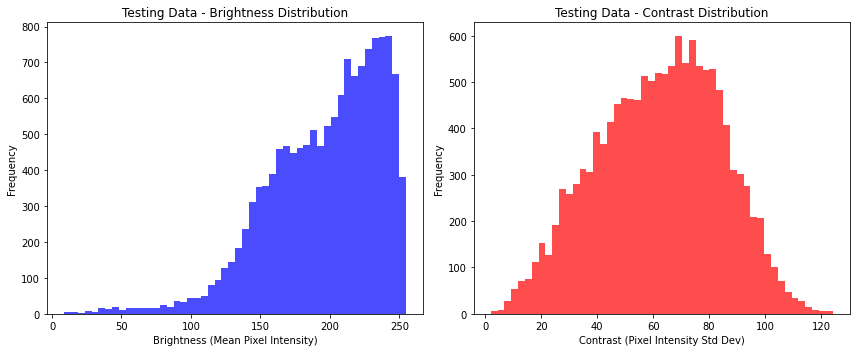

In [32]:
# Reload config to ensure any updates are applied
importlib.reload(config)

# Define image directories using config paths
RAW_IMAGE_TRAIN_DIR = Path(config.RAW_IMAGE_TRAIN_DIR)
RAW_IMAGE_TEST_SUB_DIR = Path(config.RAW_IMAGE_TEST_SUB_DIR)

# Run the analysis for training images
analyze_brightness_contrast(X_full_train, RAW_IMAGE_TRAIN_DIR, dataset_name="Training Data")

# Run the analysis for testing images
analyze_brightness_contrast(x_test_submission, RAW_IMAGE_TEST_SUB_DIR, dataset_name="Testing Data")


### 4.4 Summary of Brightness & Contrast Analysis  


From the histograms, we can see the following patterns in both **training** and **testing** datasets:  

#### 🔹 **Brightness Analysis:**  
- Most images have a brightness between **150 and 250**, meaning they are neither too dark nor too bright.  
- **Very few images are underexposed (too dark, brightness < 50)**, so this is not a major issue.  
- Some images **reach the maximum intensity (255)**, which could mean some are overexposed (too bright).  

#### 🔹 **Contrast Analysis:**  
- Contrast follows a **normal distribution**, with most images having values between **60 and 80**, meaning they have a good balance between light and dark areas.  
- **Very low contrast images (< 20) are rare**, so most images keep enough detail.  
- A small number of images have **very high contrast (> 120)**, which could mean strong shadows or edited images.  

####  **Main Observations:**  
✔ No major issues with **underexposed (too dark) images**.  

/!\ Some images may be **overexposed (too bright)**.  

✔ Most images have **good contrast**, making details clear.  

/!\ A few images have **very high contrast**, which could be worth checking.  

----


## 5. Image Visualization: Sample, Random, and Category-Level Analysis 


**Display a Single Sample Image**
  - Training Data: Show one random image from X_full_train.
  - Testing Data: Show one random image from x_test_submission.

**Display Multiple Random Images**
  - Training Data: Show a random selection of images (e.g., 9 images).
  - Testing Data: Show a random selection of images (e.g., 6 images).

**Display Multiple Images for a Specific Product Category**
  - Training Data: Show one representative image for a selection of product categories (e.g., 10 out of 27 categories).
  - Testing Data: Not applicable (since we don’t have category labels)

### 5.1 Display a Single Sample Image (Training & Testing Data)

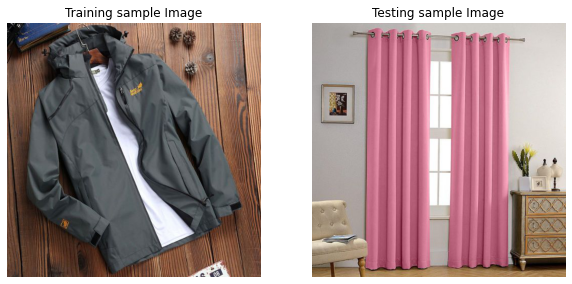

In [39]:
# Reload config to ensure any updates are applied
importlib.reload(config)


# Define image directories using config paths
RAW_IMAGE_TRAIN_DIR = Path(config.RAW_IMAGE_TRAIN_DIR)
RAW_IMAGE_TEST_SUB_DIR = Path(config.RAW_IMAGE_TEST_SUB_DIR)


# Select one random image from training and testing data
sample_train_img = X_full_train["image_name"].sample(1).values[0]
test_img_sub_path = x_test_submission["image_name"].sample(1).values[0]

train_img_path = os.path.join(RAW_IMAGE_TRAIN_DIR, sample_train_img)
test_img_sub_path = os.path.join(RAW_IMAGE_TEST_SUB_DIR, test_img_sub_path)

# Display images side by side
fig, axes = plt.subplots(1, 2, figsize=(10,5))

for ax, img_path, title in zip(axes, [train_img_path, test_img_sub_path], ["Training sample Image", "Testing sample Image"]):
    if os.path.exists(img_path):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(title)
    else:
        ax.set_title("Missing Image")
        ax.axis("off")


plt.show()


### 5.2 Display Multiple Random Images (Training Data)  

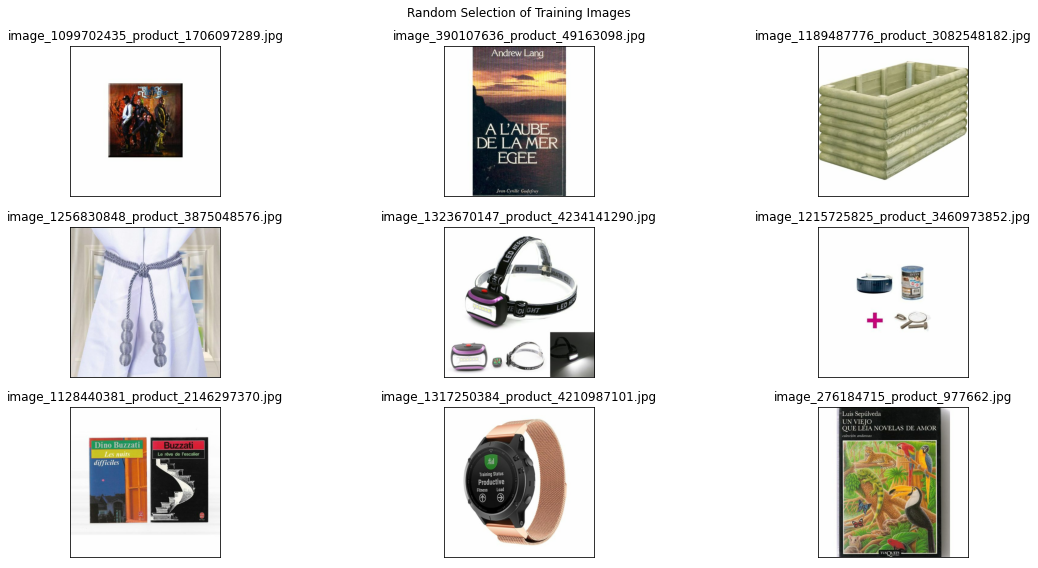

In [52]:
# Reload config to ensure any updates are applied
importlib.reload(config)

# Define image directories using config paths
RAW_IMAGE_TRAIN_DIR = Path(config.RAW_IMAGE_TRAIN_DIR)

# Number of images to be displayed
num_images = 9
num_cols = 3  # Number of columns in the grid

# Calculate the number of rows required
num_rows = math.ceil(num_images / num_cols)

# Select random images from the training dataset
random_images = X_full_train["image_name"].sample(n=num_images).tolist()

# Create a figure for displaying images
plt.figure(figsize=(18, 8))

# Loop through selected images and display them
for i, img_name in enumerate(random_images, start=1):
    img_path = os.path.join(RAW_IMAGE_TRAIN_DIR, img_name)

    try:
        # Load and decode image
        img = tf.io.read_file(img_path)
        img = tf.image.decode_jpeg(img, channels=3)

        # Plot image
        plt.subplot(num_rows, num_cols, i)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
        plt.title(img_name)

    except Exception as e:
        print(f"Error loading image: {img_name} | {e}")

plt.suptitle("Random Selection of Training Images")
plt.tight_layout()
plt.show()


### 5.3 Display Multiple Random Images (Testing Data)  

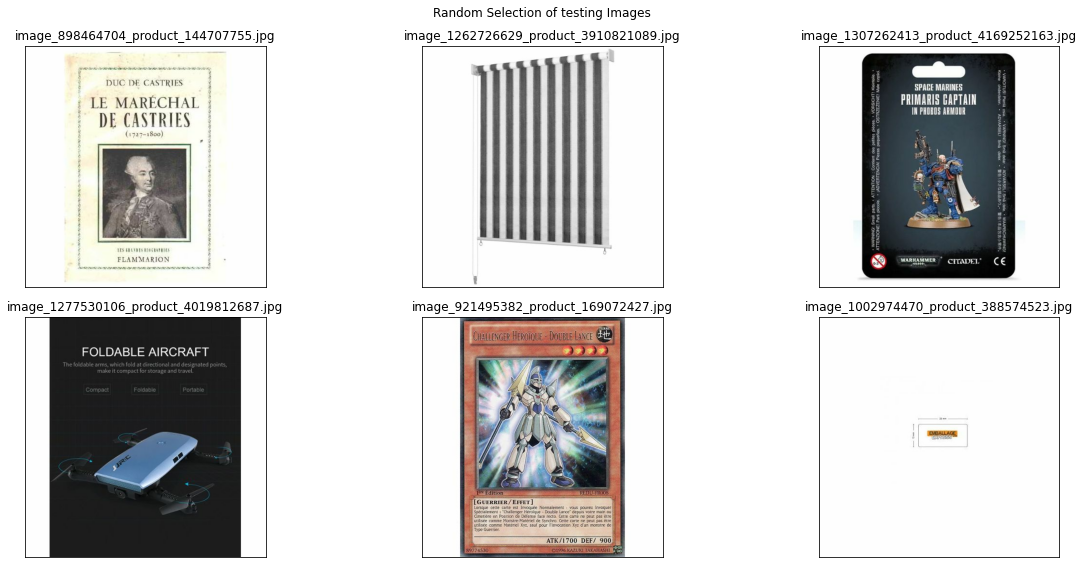

In [53]:
# Reload config to ensure any updates are applied
importlib.reload(config)

RAW_IMAGE_TEST_SUB_DIR = Path(config.RAW_IMAGE_TEST_SUB_DIR)

# Number of images to be displayed
num_images = 6
num_cols = 3  # Number of columns in the grid

# Calculate the number of rows required
num_rows = math.ceil(num_images / num_cols)

# Select random images from the testing dataset
random_images = x_test_submission["image_name"].sample(n=num_images).tolist()

# Create a figure for displaying images
plt.figure(figsize=(18, 8))

# Loop through selected images and display them
for i, img_name in enumerate(random_images, start=1):
    img_path = os.path.join(RAW_IMAGE_TEST_SUB_DIR, img_name)

    try:
        # Load and decode image
        img = tf.io.read_file(img_path)
        img = tf.image.decode_jpeg(img, channels=3)

        # Plot image
        plt.subplot(num_rows, num_cols, i)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
        plt.title(img_name)

    except Exception as e:
        print(f"Error loading image: {img_name} | {e}")

plt.suptitle("Random Selection of testing Images")
plt.tight_layout()
plt.show()


### 5.4 Display Multiple Images for a Specific Product Category (Training Data Only)  

In [55]:
# Reload config to ensure any updates are applied
importlib.reload(config)

# Define image directories using config paths
RAW_IMAGE_TRAIN_DIR = Path(config.RAW_IMAGE_TRAIN_DIR)

def display_category_images(df, category_code, num_images=10, num_cols=3):
    """
    Display multiple images for a specific product category.

    Parameters:
    - df (pd.DataFrame): The dataset containing product information.
    - category_code (int): The product category (`prdtypecode`) to visualize.
    - num_images (int): Number of images to display (default: 10).
    - num_cols (int): Number of columns in the grid layout (default: 3).

    Returns:
    - Displays a grid of images for the selected category.
    """
    # Filter dataset for the selected product category
    category_images = df[df['prdtypecode'] == category_code]

    # Ensure we do not sample more images than available
    num_images = min(num_images, len(category_images))

    # Compute number of rows required
    num_rows = math.ceil(num_images / num_cols)

    # Select random images from the chosen category
    random_images = category_images.sample(n=num_images, random_state=42)

    # Create the figure
    plt.figure(figsize=(18, 8))

    # Loop through selected images and display them
    for i, (_, row) in enumerate(random_images.iterrows(), start=1):
        img_path = os.path.join(RAW_IMAGE_TRAIN_DIR, row["image_name"])

        try:
            # Load and decode the image
            img = tf.io.read_file(img_path)
            img = tf.image.decode_jpeg(img, channels=3)

            # Plot image
            plt.subplot(num_rows, num_cols, i)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(img)
            plt.title(f"{row['image_name']}", fontsize=9)

        except Exception as e:
            print(f"Error loading image: {row['image_name']} | {e}")

    plt.suptitle(f"Product Category: {category_code} ({num_images} Images)", fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.show()


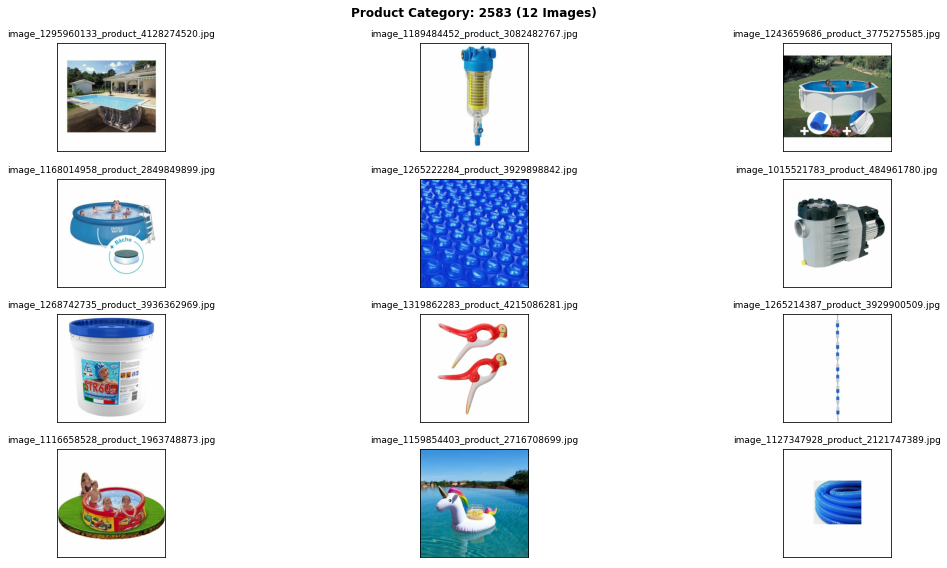

In [56]:
# Display images for category 2583
display_category_images(X_full_train, category_code=2583, num_images=12)

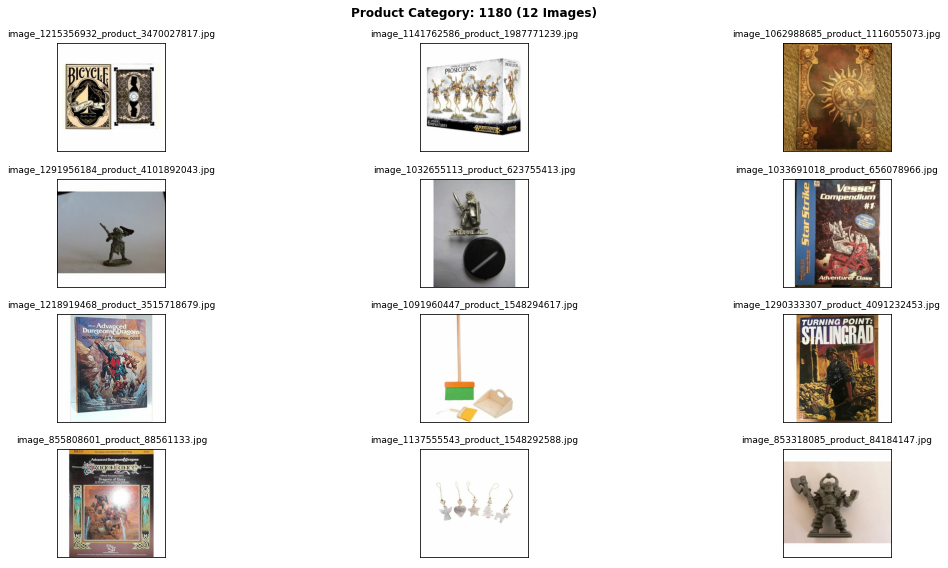

In [14]:
# Display images for category 1180
display_category_images(X_full_train, category_code=1180, num_images=12)

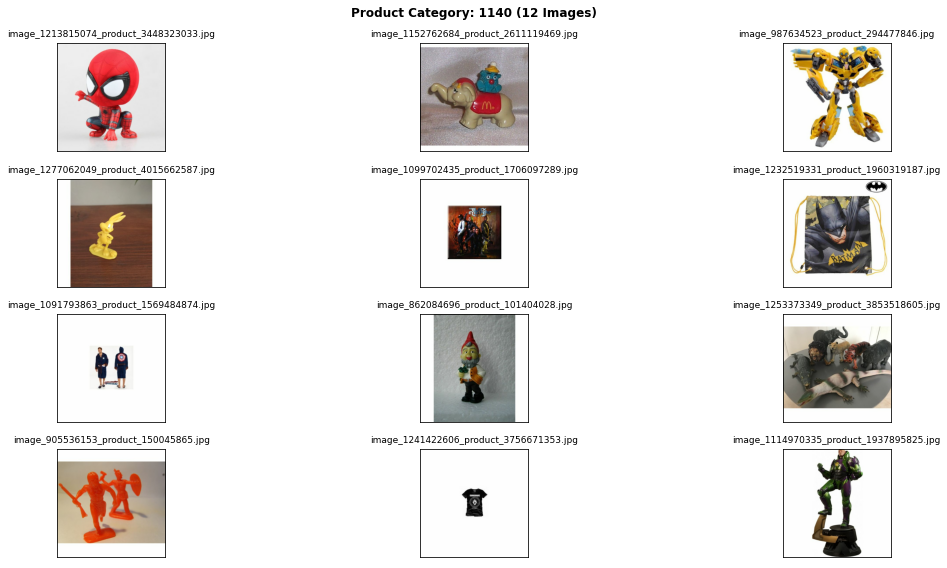

In [15]:
# Display images for category 1140
display_category_images(X_full_train, category_code=1140, num_images=12)


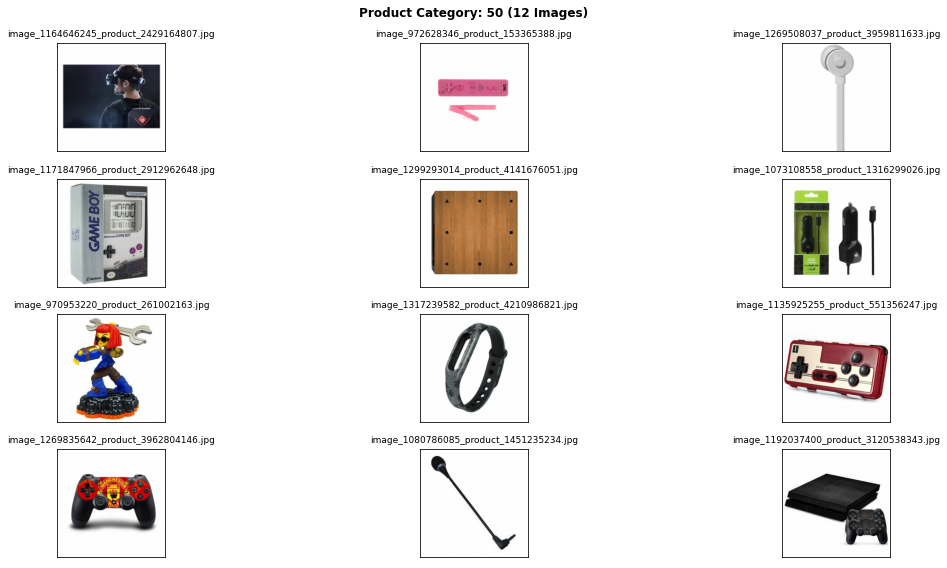

In [16]:
# Display images for category 50
display_category_images(X_full_train, category_code=50, num_images=12)

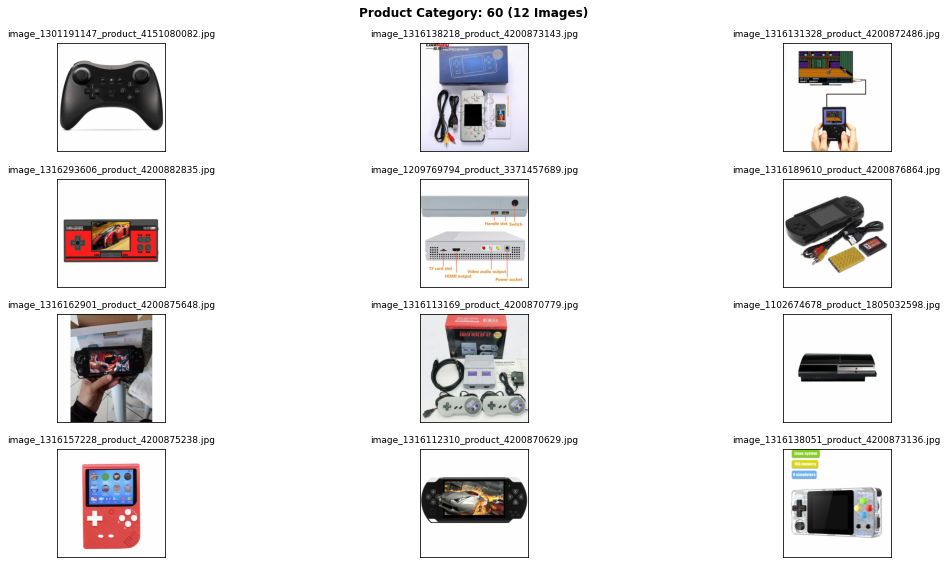

In [17]:
# Display images for category 60
display_category_images(X_full_train, category_code=60, num_images=12)

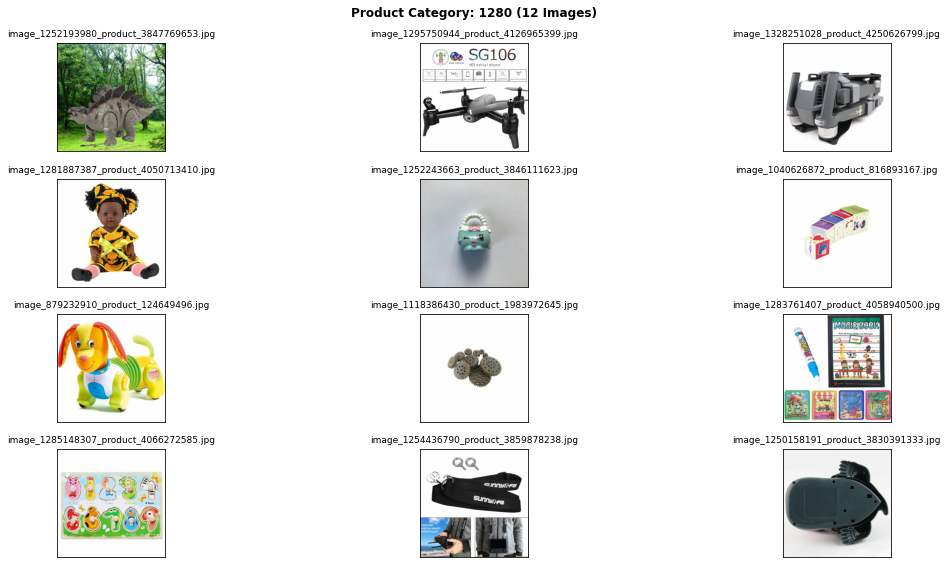

In [18]:
# Display images for category 1280
display_category_images(X_full_train, category_code=1280, num_images=12)

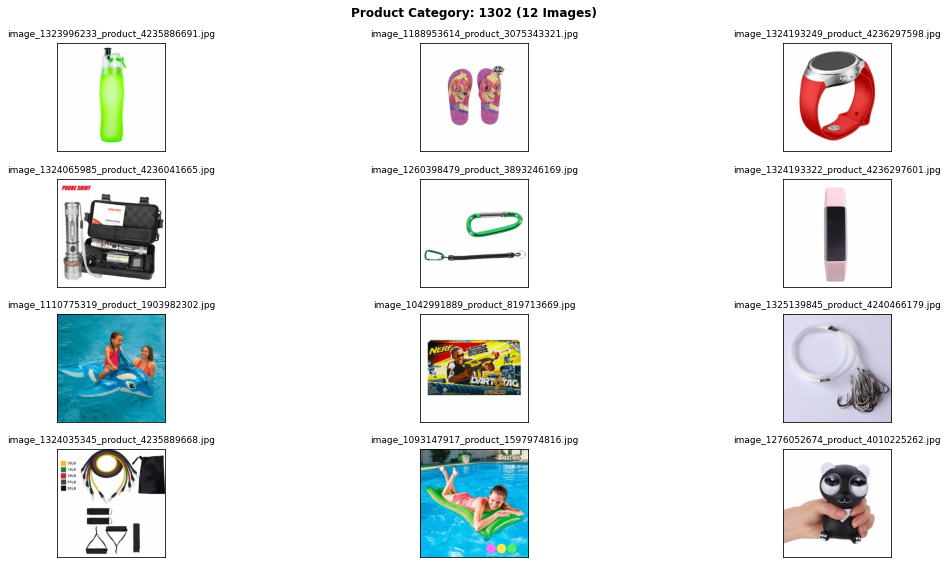

In [19]:
# Display images for category 1302
display_category_images(X_full_train, category_code=1302, num_images=12)

## 6. Analyzing Similarities Between Certain Classes   

In the previous section, we explored various **product categories** by displaying random samples from each class.  

During this exploration, we noticed that **some product categories share strong visual similarities**, making it difficult to distinguish between them.  

For example:  
- **Class 1180 and 1140** contain some images that appear visually close. 
- **Class 50 and 60** contain similar products.  
 

There may be other cases where different product categories look alike. To better understand these similarities, we will now take a closer look at how visually close some classes are.  


In [58]:
# Reload config to ensure any updates are applied
importlib.reload(config)

# Define image directories using config paths
RAW_IMAGE_TRAIN_DIR = Path(config.RAW_IMAGE_TRAIN_DIR)

def get_sample_images(df, class_label, num_samples=5):
    """
    Select a sample of image file paths for a given product class.

    Parameters:
    - df (pd.DataFrame): The dataset containing product image information.
    - class_label (int): The product category to filter images from.
    - num_samples (int): Number of images to select.

    Returns:
    - List of valid image file paths.
    """
    # Get all images corresponding to the given class
    class_images = df[df["prdtypecode"] == class_label]["image_name"].tolist()
    
    # Randomly select the required number of images (ensure at least some exist)
    selected_images = random.sample(class_images, min(num_samples, len(class_images)))
    
    # Generate full file paths and filter out non-existing files
    return [os.path.join(RAW_IMAGE_TRAIN_DIR, img) for img in selected_images if os.path.exists(os.path.join(RAW_IMAGE_TRAIN_DIR, img))]


def plot_image_comparison(df, class1, class2, num_samples=5):
    """
    Display a side-by-side comparison of images from two product classes.

    Parameters:
    - df (pd.DataFrame): The dataset containing image information.
    - class1 (int): The first product category to compare.
    - class2 (int): The second product category to compare.
    - num_samples (int): Number of images to display per class.

    Returns:
    - Displays a matplotlib plot comparing images from both classes.
    """
    # Retrieve image file paths for each class
    images_class1 = get_sample_images(df, class1, num_samples)
    images_class2 = get_sample_images(df, class2, num_samples)

    # Determine the number of images to display (use the minimum available)
    num_images = min(len(images_class1), len(images_class2))
    
    if num_images == 0:
        print(f"No images found for comparison between Class {class1} and Class {class2}.")
        return

    # Create a figure for side-by-side visualization
    fig, axes = plt.subplots(num_images, 2, figsize=(8, 3 * num_images))

    for i in range(num_images):
        # Display an image from Class 1
        img1 = Image.open(images_class1[i])
        axes[i, 0].imshow(img1)
        axes[i, 0].axis("off")
        axes[i, 0].set_title(f"Class {class1}")

        # Display an image from Class 2
        img2 = Image.open(images_class2[i])
        axes[i, 1].imshow(img2)
        axes[i, 1].axis("off")
        axes[i, 1].set_title(f"Class {class2}")

    plt.tight_layout()
    plt.show()


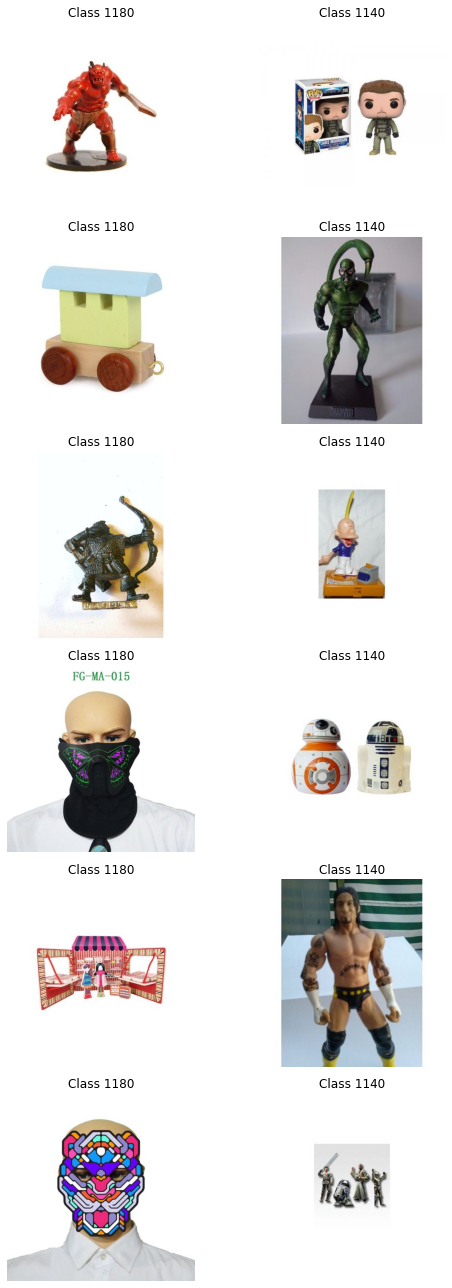

In [21]:
# Call the function to compare Class 1180 vs Class 1140
plot_image_comparison(X_full_train, 1180, 1140, num_samples=6)

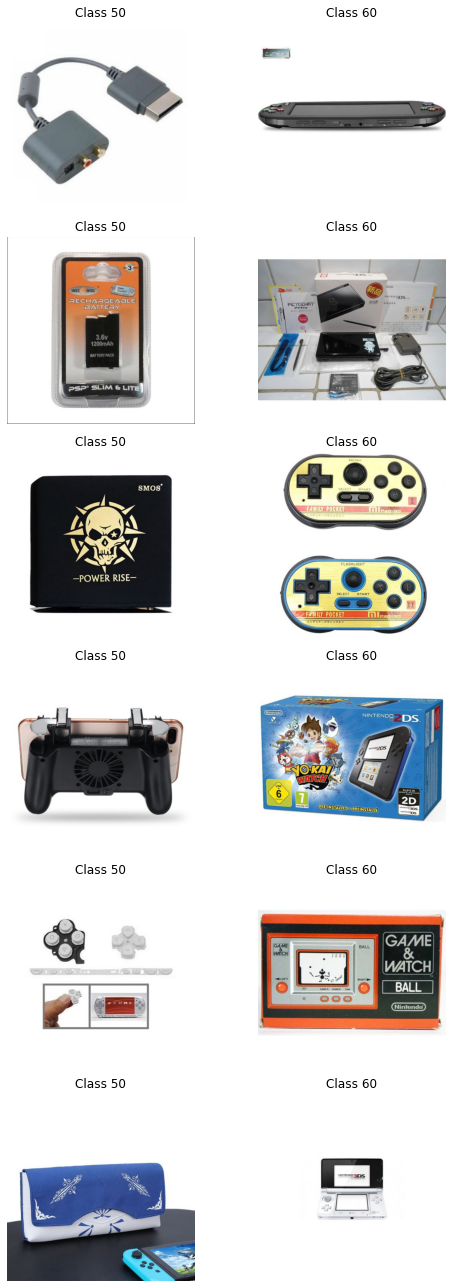

In [59]:
# Call the function to compare Class 50 vs Class 60
plot_image_comparison(X_full_train, 50, 60, num_samples=6)

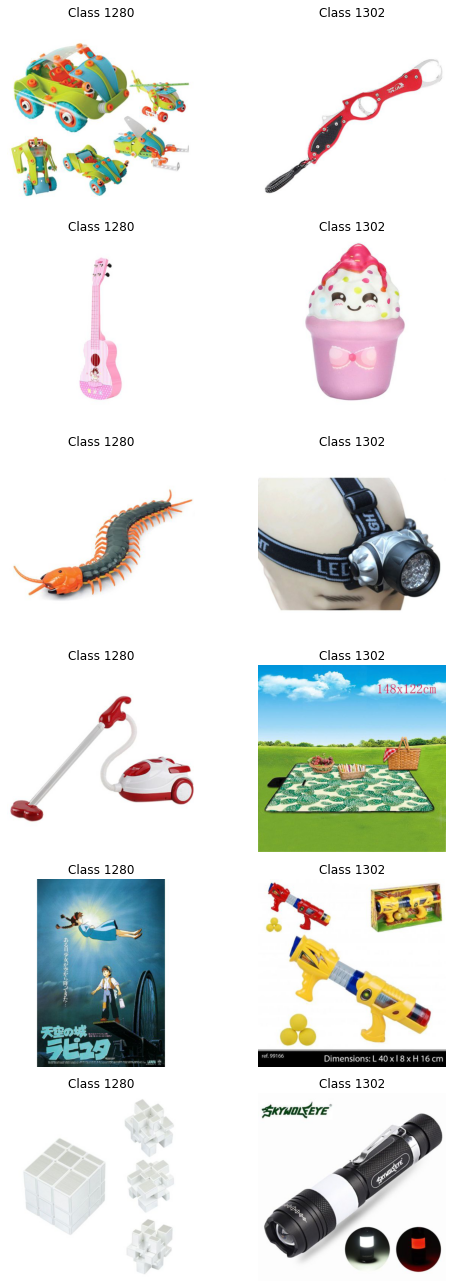

In [61]:
# Call the function to compare Class 1280 vs Class 1302
plot_image_comparison(X_full_train, 1280, 1302, num_samples=6)

## 7. Observations from Image Analysis  

After analyzing image availability, properties, and visualization, we have identified key insights regarding the dataset.

---

### 7.1 Image Availability  
- All expected images are present in both the training and testing datasets.  
- No missing images or extra files were found in the respective folders.  

**Conclusion:** The dataset is complete, and all images are correctly linked to their metadata.

---

### 7.2 Image Properties Analysis  

#### 7.2.1 Image Size & Format  
- All training and testing images have the same dimensions: (500, 500).  
- All images are in JPEG format across both datasets.  


#### 7.2.2 Image Color Mode  
- 100% of images are in RGB format for both training and testing datasets.  
- No grayscale images were detected.  

**Conclusion:** Since all images are in color, no conversion is necessary before training the model.

#### 7.2.3 Analyzing Brightness & Contrast for Training and Testing Data  

- The majority of images have a **brightness between 150 and 250**, meaning they are well-lit.  
- **Few images are underexposed (brightness < 50)**, so dark images are not a major issue.  
- Some images **reach the maximum intensity (255)**, indicating possible overexposure.  
- **Contrast is normally distributed**, peaking around **60-80**, meaning most images have a good balance of light and dark areas.  
- A few images have **very high contrast (> 120)**, which might need further review.  

**Conclusion:**  
- No significant problems with **underexposed images**, but some **overexposed** images exist.  
- The dataset mostly maintains a **good contrast balance**, but a few **high-contrast images** may require preprocessing adjustments.  
---
  
### 7.3 Image Visualization: Identifying Potential Issues  
- Certain classes exhibit **strong visual similarities**, which could affect classification:  
  - **Class 1180 and 1140** contain highly similar images.  
  - **Class 50 and 60** share overlapping visual features.  
  - **Class 1280 and 1302** also appear visually close.  
- Some images contain **large white backgrounds**, making them look like **small thumbnails**.  

**🔹 Conclusion:**  
- **Class similarity** might cause **misclassification issues** → Requires further investigation with feature-based analysis.  
- **White background issues** could impact the model's performance → Might need **image preprocessing techniques** (cropping, augmentation).  


## 8. Saving Updated Datasets for Future Use

To avoid reloading and recomputing the datasets in every notebook, we save them as Pickle files.  

###  Previously Saved Datasets  
In the previous notebook, we stored:  
- **`X_full_train.pkl`** → Training dataset including target labels (y_train) 
- **`x_test_submission.pkl`** → Test dataset, used for final submission.  
- **`y_train.pkl`** → Target labels, stored separately for flexibility.  

###  Why Save Updated Files?  
In this notebook, we have **generated image filenames** by combining `imageid` and `productid`.  
To ensure consistency across future analyses, we **save the updated datasets** containing these filenames.  

###  Newly Saved Datasets  
✔ **`X_train_full_img.pkl`** → Includes training features, target labels, and generated image filenames.  
✔ **`X_test_img_sub.pkl`** → Includes test dataset with generated image filenames.  

These files will be used in **Text and Image preprocessing, model training, and evaluation** in later notebooks.  


In [75]:
# Reload config to ensure any updates are applied
importlib.reload(config)

# Define directory for interim image-related pickle files
INTERIM_IMAGE_DIR = Path(config.INTERIM_DIR)

INTERIM_IMAGE_DIR.mkdir(parents=True, exist_ok=True)  # Ensure directory exists

# Define file paths for storing image-related datasets
TRAIN_IMAGE_PICKLE_PATH = INTERIM_IMAGE_DIR / "X_train_full_img.pkl"
TEST_IMAGE_SUB_PICKLE_PATH = INTERIM_IMAGE_DIR / "X_test_img_sub.pkl"

# Remove the 'color_mode' column as it was used only for analysis and is no longer needed
if "color_mode" in X_full_train.columns:
    X_full_train.drop(columns=["color_mode"], inplace=True)
if "color_mode" in x_test_submission.columns:
    x_test_submission.drop(columns=["color_mode"], inplace=True)

print(" 'color_mode' column removed. It was used for image color analysis and is no longer needed.")

try:
    # Save updated training dataset
    X_full_train.to_pickle(TRAIN_IMAGE_PICKLE_PATH)
    print(f"\n Training dataset saved: {INTERIM_IMAGE_DIR}")

        # Save updated test dataset
    x_test_submission.to_pickle(TEST_IMAGE_SUB_PICKLE_PATH)
    print(f"\n Test dataset saved: {INTERIM_IMAGE_DIR}")

except Exception as e:
    print(f"\n Error saving datasets: {e}")


 'color_mode' column removed. It was used for image color analysis and is no longer needed.

 Training dataset saved: D:\Data_Science\Append_Data_Engineer_AWS_MLOPS\Data_Scientist_Rakuten_Project-main\data\interim

 Test dataset saved: D:\Data_Science\Append_Data_Engineer_AWS_MLOPS\Data_Scientist_Rakuten_Project-main\data\interim


## 9. 🔄 Next Steps  

Now that we have explored the image dataset and saved the updated files, we will focus on **text preprocessing**.  


We will apply techniques such as:  
✔ Removing special characters and punctuation  
✔ Lowercasing text for consistency  
✔ Handling missing values in product descriptions  
✔ Tokenization and vectorization 

### 📌 What About Image Preprocessing?  
For **image preprocessing**, we will handle it later during the **CNN deep learning modeling phase**.  
At that stage, we will:  
✔ Apply image augmentation techniques (if necessary)  
✔ Normalize pixel values for CNN models  
✔ Resize/crop images if needed for input consistency  

➡️ **Proceed to `4_Text_Cleaning.ipynb` for text cleaning.**  
